<a href="https://colab.research.google.com/github/satwik707/Supervised-Learning/blob/master/Logical_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data=pd.read_csv('ex2data1.txt')

data.describe()

,marks1,marks2,result
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [ ]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]
X

,marks1,marks2
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376
...,...,...
95,83.489163,48.380286
96,42.261701,87.103851
97,99.315009,68.775409
98,55.340018,64.931938


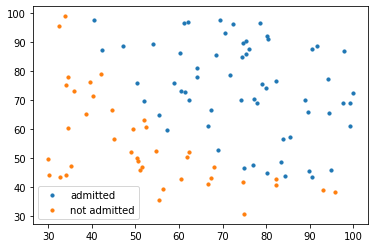

In [ ]:
admitted=data.loc[Y==1]
not_admitted=data.loc[Y==0]

plt.scatter(admitted.iloc[:,0],admitted.iloc[:,1],s=10,label="admitted")
plt.scatter(not_admitted.iloc[:,0],not_admitted.iloc[:,1],s=10,label="not admitted")
plt.legend()
plt.show()

In [ ]:
X=np.c_[np.ones((X.shape[0],1)),X];

Y=Y[:,np.newaxis]
theta=np.zeros((X.shape[1],1));


In [ ]:
theta=np.zeros((X.shape[1],1));
theta

array([[0.],
       [0.],
       [0.]])

In [ ]:
def sigmoid(X,theta):
  vector=np.dot(X,theta);
  return 1/(1+np.exp((-vector)));

In [ ]:
def costFunction(theta,X,Y):
  m = X.shape[0]
  J=(-1/m)*sum((Y*np.log(sigmoid(X,theta)))+((1-Y)*np.log(1-sigmoid(X,theta))))
  return J;   
  

In [ ]:
def gradient(theta,X,Y):
  m = X.shape[0]
  return (1 / m) * np.dot(X.T, sigmoid(X,theta) - Y)

In [ ]:
from scipy.optimize import fmin_tnc
def fit( X, Y, theta):
    opt_weights = fmin_tnc(func=costFunction, x0=theta,
                  fprime=gradient,args=(X, Y.flatten()))
    return opt_weights[0]
parameters = fit(X, Y, theta)
parameters

array([-25.16131865,   0.20623159,   0.20147149])

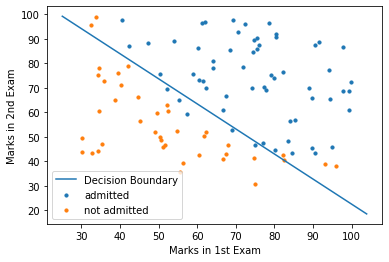

In [ ]:
x_values = [np.min(X[:, 1] - 5), np.max(X[:, 2] + 5)]
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]
plt.scatter(admitted.iloc[:,0],admitted.iloc[:,1],s=10,label="admitted")
plt.scatter(not_admitted.iloc[:,0],not_admitted.iloc[:,1],s=10,label="not admitted")
plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()

In [ ]:
def predict( x):
    theta = parameters[:, np.newaxis]
    return sigmoid(X,theta)
def accuracy( x, actual_classes, probab_threshold=0.5):
    predicted_classes = (predict(x) >= 
                         probab_threshold).astype(int)
    predicted_classes = predicted_classes.flatten()
    accuracy = np.mean(predicted_classes == actual_classes)
    return accuracy * 100
accuracy(X, Y.flatten())

89.0